In [1]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve, norm
from numpy.random import rand

In [38]:
testRandom = rand(4) #make list of 4 random numbers in [0,1]
testRandom

array([ 0.40414095,  0.69356656,  0.38550639,  0.21388827])

In [39]:
N = 1000000 #matrix size is NxN

#Default is all elements are zerio
A = lil_matrix((N,N))

#Make diagonal random numbers
A.setdiag(rand(N)) 

# Set top row, first N/10 elements, to random in [0,1]
A[0, :N/10] = rand(N/10)

# Set another chunk of a row to random numbers
A[4*N/10, 5*N/10:6*N/10] = rand(N/10)

In [40]:
#Look at part of the matrix
#i.e. look at top 4x4 elements
A[:4,:4].toarray()

array([[ 0.5435196 ,  0.99600831,  0.93086404,  0.04457133],
       [ 0.        ,  0.17035579,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.54361807,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.9577704 ]])

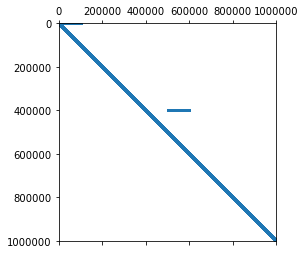

In [41]:
#Look at the whole matrix
#Draw a picture of which elements are nonzero
from matplotlib.pyplot import figure, show

fig = figure()
fig.clf()
ax = fig.gca()

ax.spy(A, markersize=1, precision=0.1)
show()

In [42]:
#Solve A x = b with b=rand [0,1]

#Make b
b = rand(N)

#Compress a
Acompressed = A.tocsr()

In [43]:
#Solve. For N=1e6, takes about a minute.

x = spsolve(Acompressed,b)

In [46]:
#Get the first few elements of x
x

array([ -7.09323687e+05,   1.07777733e+00,   1.28391936e+00, ...,
         1.28648877e+00,   3.72727313e+00,   7.16594484e-02])

In [47]:
#Check that x is a solution
Ax = Acompressed.dot(x)

In [48]:
#Check norm of Ax-b
#Norm = sqrt of sum of squares of elements in matrix
norm(Ax-b)

2.1657106129922757e-11